In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

> ADS Assignment 2

Titanic Ship Case Study

Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
 One of the reasons that the shipwreck led to such loss of life was that there were not
enough lifeboats for the passengers and crew.

 Although there was some element of luck involved in surviving the sinking, some groups of
people were more likely to survive than others, such as women, children, and the upperclass.

The problem associated with the Titanic dataset is to predict whether a passenger survived the
disaster or not. The dataset contains various features such as passenger class, age, gender,
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can
be used to build a predictive model to determine the likelihood of a passenger surviving the
disaster. The dataset offers opportunities for feature engineering, data visualization, and model
selection, making it a valuable resource for developing and testing data analysis and machine
learning skills.
Perform Below Tasks to complete the assignment:-
1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations.
    * Univariate Analysis
    * Bi - Variate Analysis
    * Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

In [362]:
df=pd.read_csv("./titanic.csv")
print(df.shape)
df

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [377]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


understanding the dataset

In [364]:
df.isnull().sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

finding counts of null values in dataset

In [365]:
df=df.drop(labels="deck",axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Removal of variable with a large proportion of missing values

In [366]:
df=df.fillna(value=df.mean()).dropna()
df.isnull().sum(),df.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_4808\1933562635.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(value=df.mean()).dropna()


(survived       0
 pclass         0
 sex            0
 age            0
 sibsp          0
 parch          0
 fare           0
 embarked       0
 class          0
 who            0
 adult_male     0
 embark_town    0
 alive          0
 alone          0
 dtype: int64,
 (889, 14))

handling missing values

In [367]:
y=df["survived"]
x=df.drop(labels=["survived"],axis=1)
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Splitting data into independent and dependent variables

In [368]:
x=pd.DataFrame(OrdinalEncoder().fit_transform(x,y),columns=df.drop(labels=["survived"],axis=1).columns)
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,2.0,1.0,28.0,1.0,0.0,18.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0
1,0.0,0.0,52.0,1.0,0.0,207.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2,2.0,0.0,34.0,0.0,0.0,41.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0
3,0.0,0.0,48.0,1.0,0.0,189.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0
4,2.0,1.0,48.0,0.0,0.0,43.0,2.0,2.0,1.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,1.0,1.0,35.0,0.0,0.0,85.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0
885,0.0,0.0,24.0,0.0,0.0,153.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0
886,2.0,0.0,39.0,1.0,2.0,131.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0
887,0.0,1.0,34.0,0.0,0.0,153.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


Variable encoding

In [370]:
x=pd.DataFrame(StandardScaler().fit_transform(x,y),columns=df.drop(labels=["survived"],axis=1).columns)
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0.825209,0.735342,-0.671461,0.488500,-0.474326,-1.247313,0.586840,0.825209,-0.352559,0.809626,0.586840,-0.786961,-1.229349
1,-1.572211,-1.359911,0.769091,0.488500,-0.474326,1.461772,-1.939555,-1.572211,1.332520,-1.235139,-1.939555,1.270711,-1.229349
2,0.825209,-1.359911,-0.311323,-0.505267,-0.474326,-0.917636,0.586840,0.825209,1.332520,-1.235139,0.586840,1.270711,0.813439
3,-1.572211,-1.359911,0.528999,0.488500,-0.474326,1.203764,0.586840,-1.572211,1.332520,-1.235139,0.586840,1.270711,-1.229349
4,0.825209,0.735342,0.528999,-0.505267,-0.474326,-0.888969,0.586840,0.825209,-0.352559,0.809626,0.586840,-0.786961,0.813439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.373501,0.735342,-0.251300,-0.505267,-0.474326,-0.286950,0.586840,-0.373501,-0.352559,0.809626,0.586840,-0.786961,0.813439
885,-1.572211,-1.359911,-0.911553,-0.505267,-0.474326,0.687748,0.586840,-1.572211,1.332520,-1.235139,0.586840,1.270711,0.813439
886,0.825209,-1.359911,-0.011208,0.488500,2.006119,0.372404,0.586840,0.825209,1.332520,-1.235139,0.586840,-0.786961,-1.229349
887,-1.572211,0.735342,-0.311323,-0.505267,-0.474326,0.687748,-1.939555,-1.572211,-0.352559,0.809626,-1.939555,1.270711,0.813439


Variable Scaling

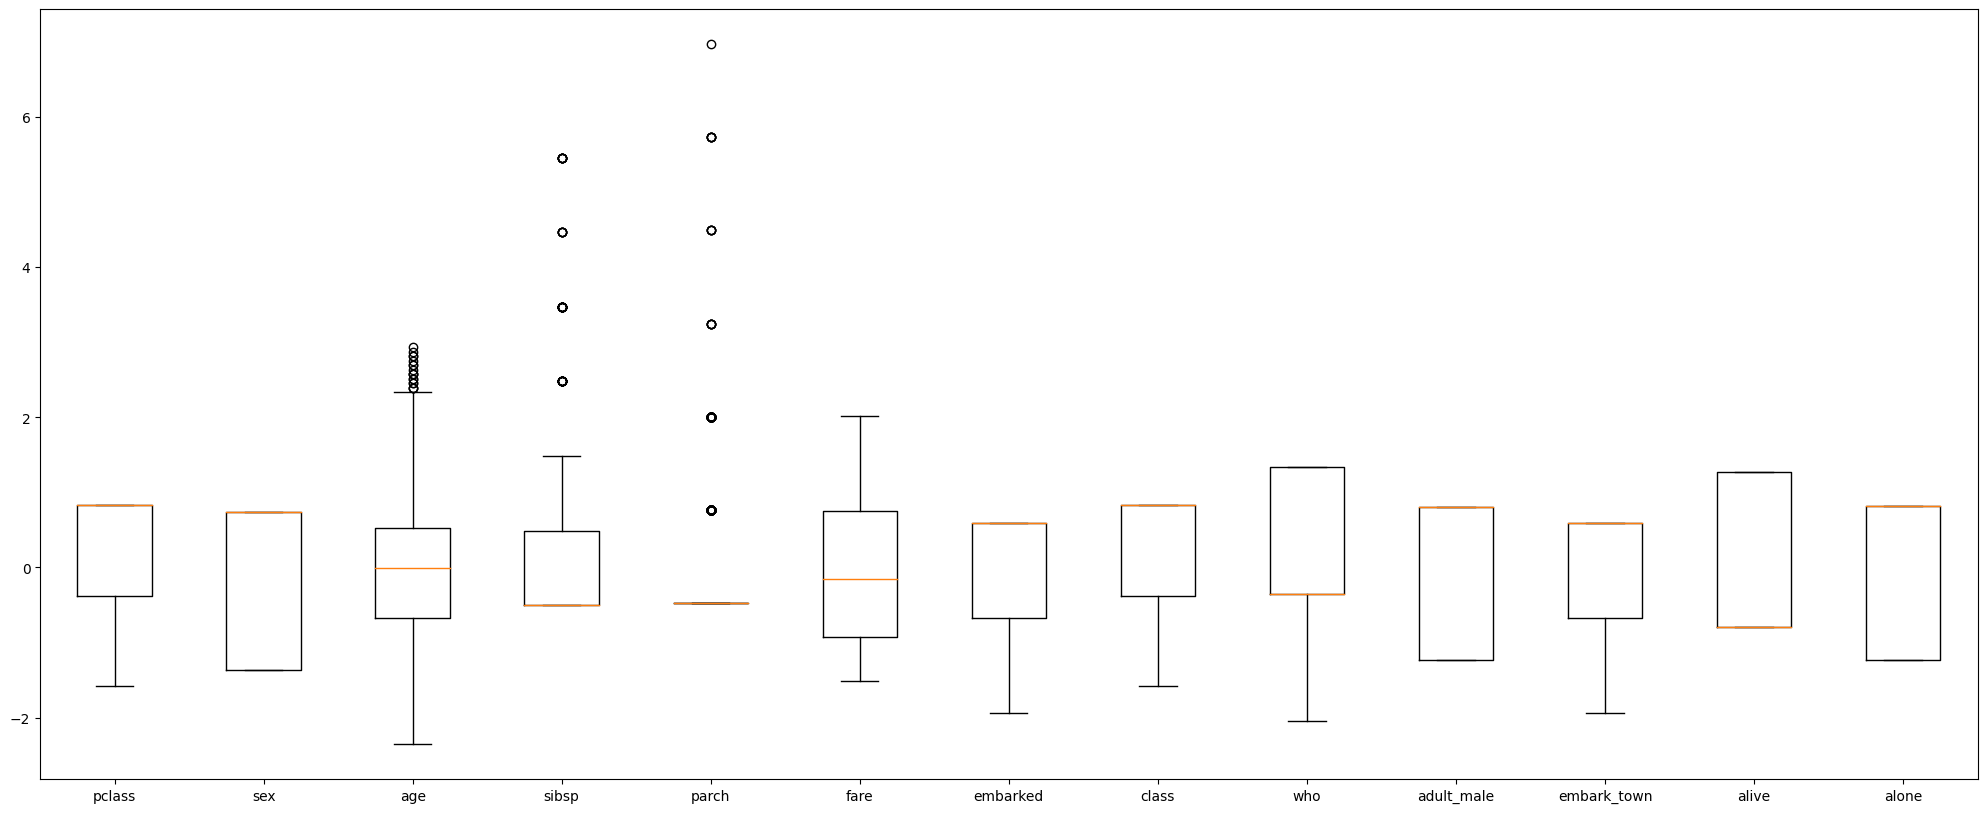

In [371]:
plt.figure(figsize=(25,10))
_=plt.boxplot(x)
_=plt.xticks(ticks=np.arange(1,14),labels=df.drop(labels=["survived"],axis=1).columns)

obtaining descriptive statistics +outliers

In [372]:
valid=list()
par=x["parch"].quantile(0.99)
sib=x["sibsp"].quantile(0.99)
ag=x["age"].quantile(0.99)
for i in range(x["adult_male"].size):
    if(x["parch"][i]>=par or x["sibsp"][i]>=sib or x["age"][i]>=ag):
        valid.append(i)
x=x.drop(valid)
y=y.drop(valid)
x.shape,y.shape

((856, 13), (856,))

Removal of outlier data

In [373]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=170)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((642, 13), (214, 13), (642,), (214,))

Splitting of data

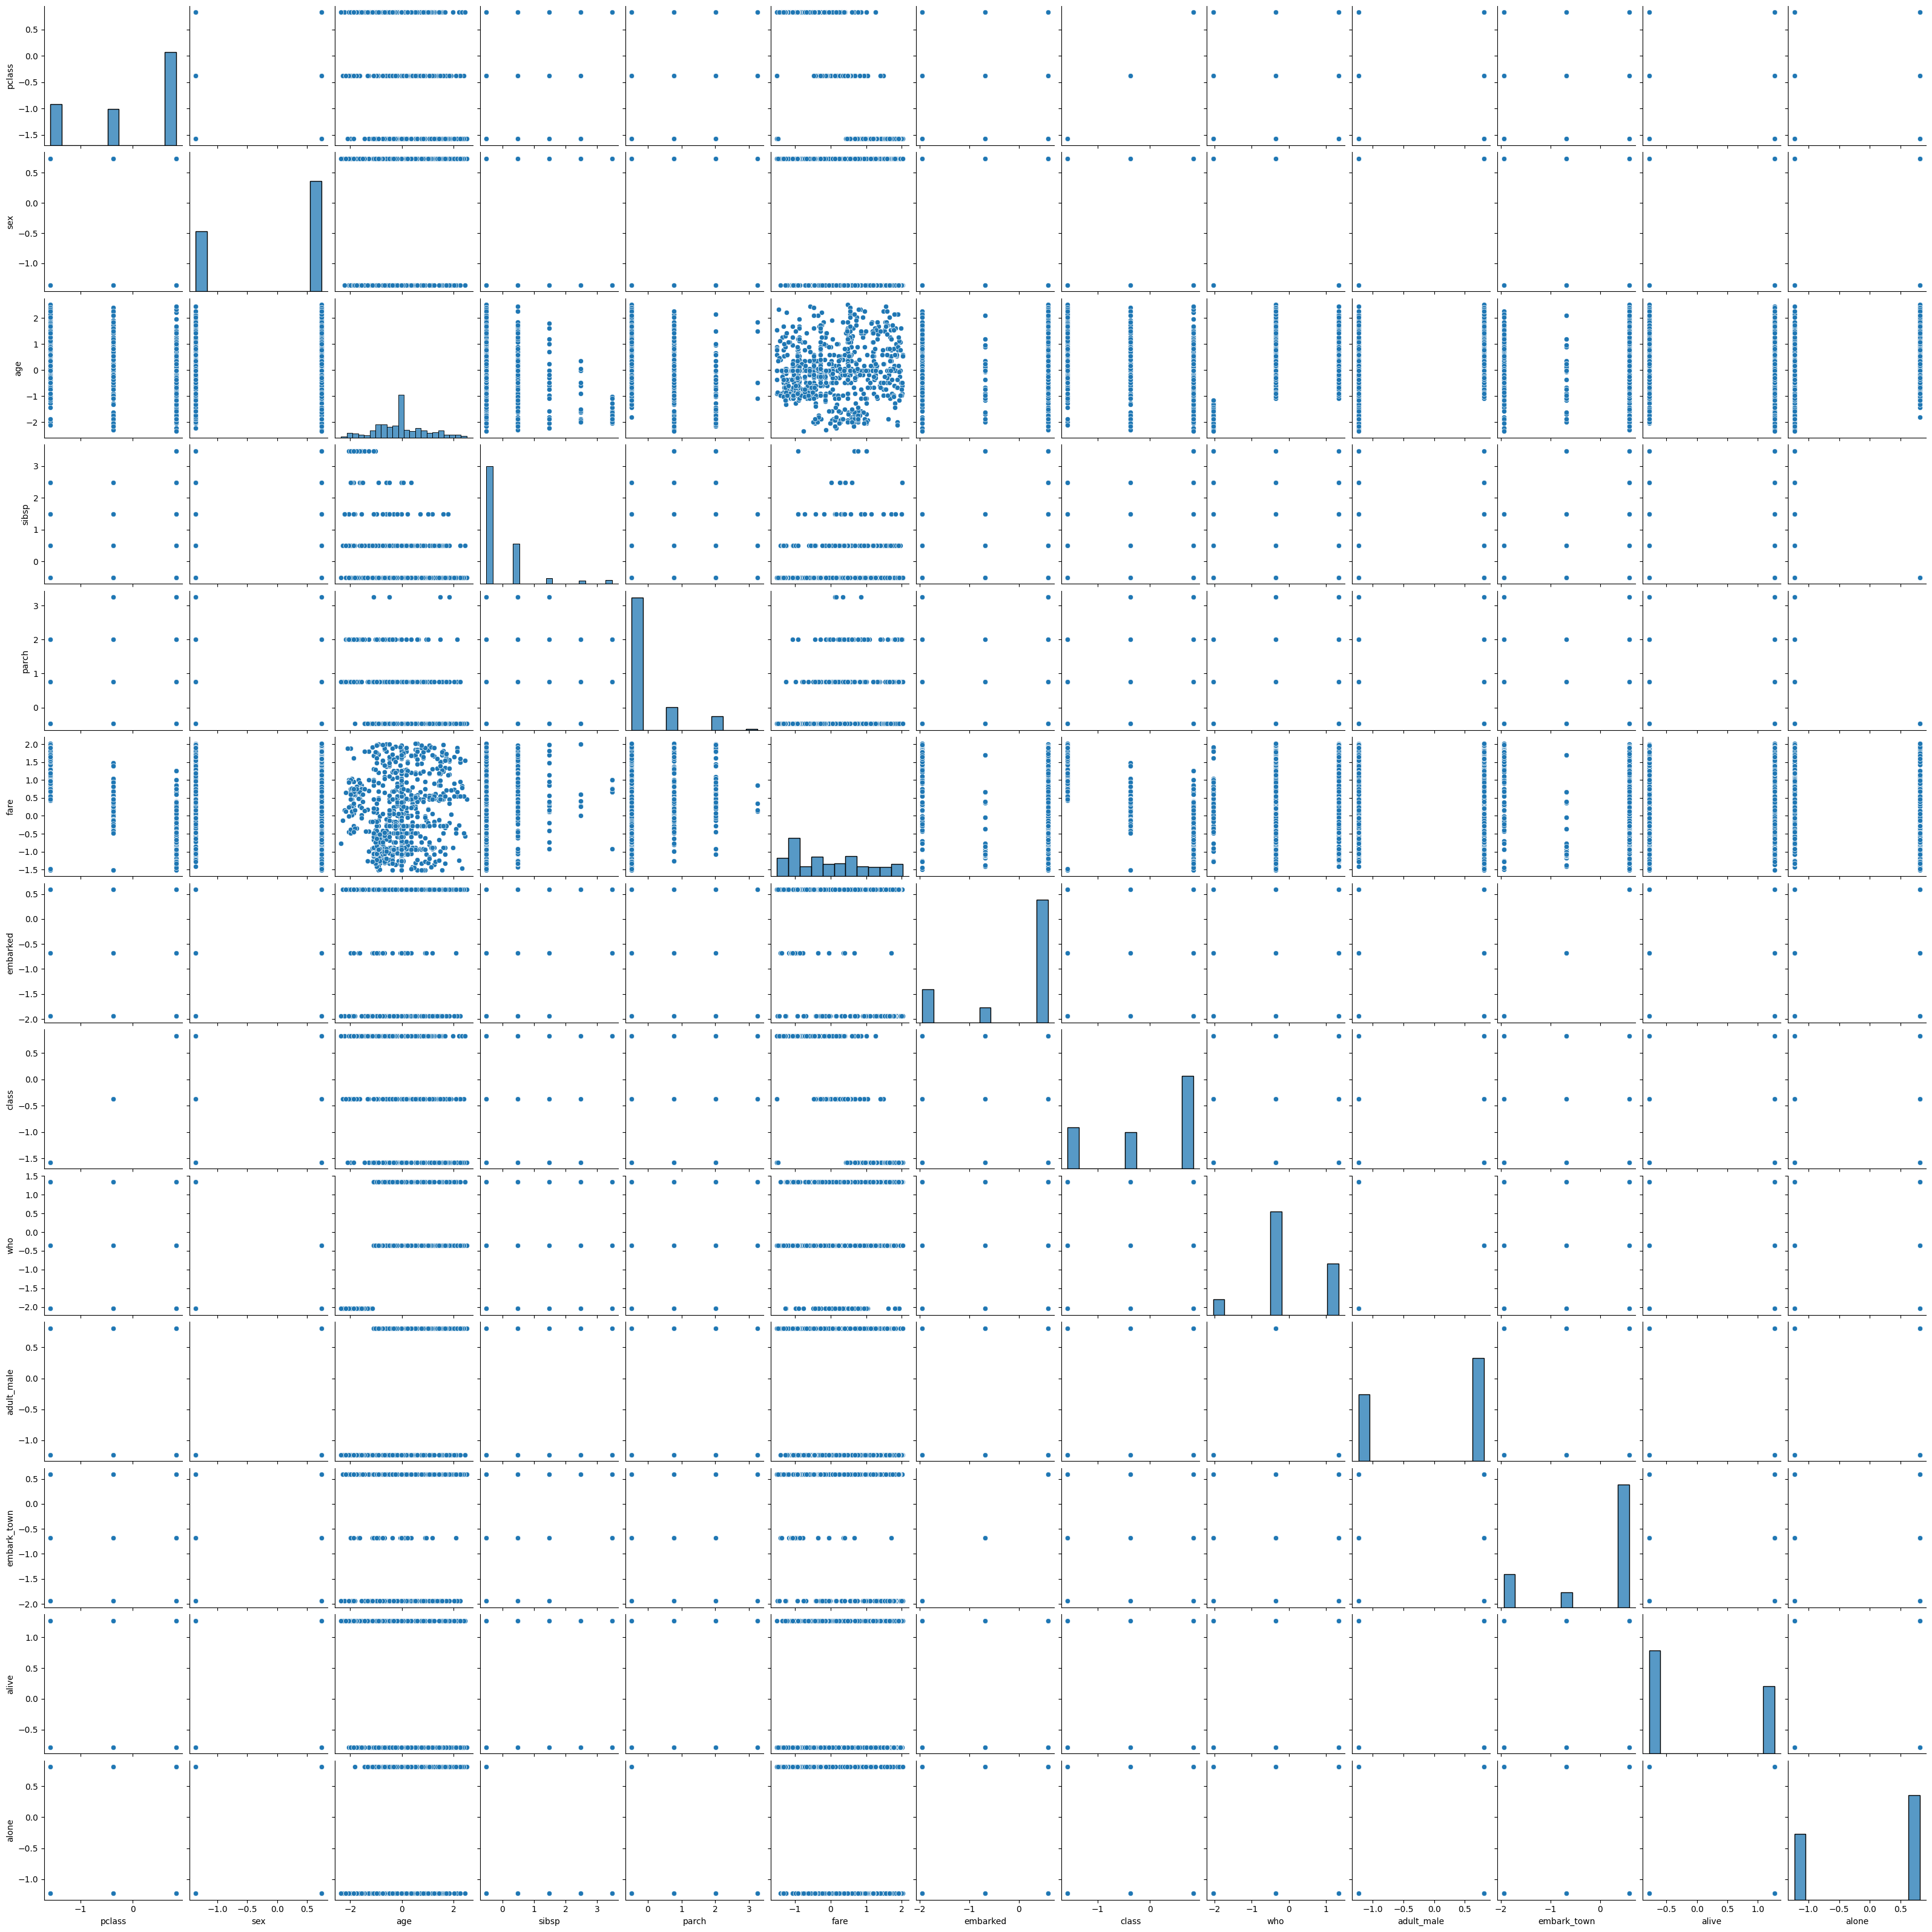

In [374]:
_=sns.pairplot(x)

Bi variate analysis

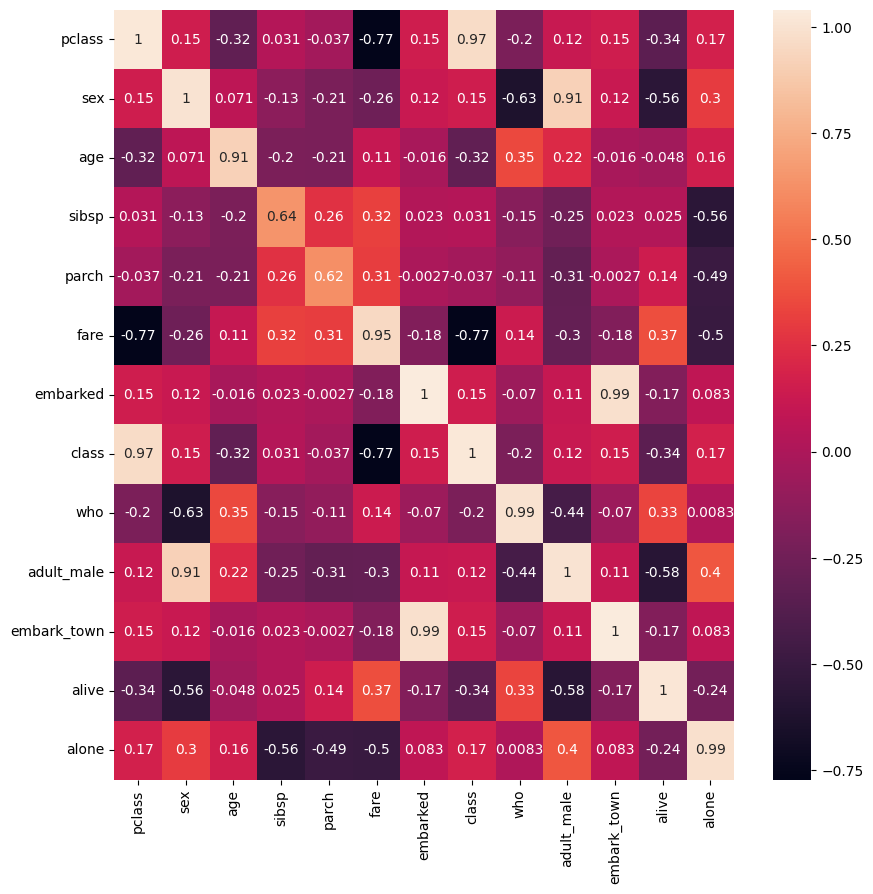

In [375]:
pc=PCA(n_components=9,random_state=170).fit(x,y)
plt.figure(figsize=(10,10))
_=sns.heatmap(pc.get_covariance(),xticklabels=x.columns,yticklabels=x.columns,annot=True)

Multi variate analysis

In [376]:
x.describe()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,-0.009407,-0.001423,-0.037784,-0.067592,-0.087481,-0.030013,-0.009342,-0.009407,-0.000188,0.004619,-0.009342,0.025531,0.025915
std,0.999999,1.001028,0.955872,0.817761,0.793187,0.996193,1.006975,0.999999,0.997437,0.999590,1.006975,1.006420,0.994840
min,-1.572211,-1.359911,-2.352106,-0.505267,-0.474326,-1.505322,-1.939555,-1.572211,-2.037637,-1.235139,-1.939555,-0.786961,-1.229349
25%,-0.373501,-1.359911,-0.671461,-0.505267,-0.474326,-0.931970,-0.676357,-0.373501,-0.352559,-1.235139,-0.676357,-0.786961,-1.229349
50%,0.825209,0.735342,-0.011208,-0.505267,-0.474326,-0.251115,0.586840,0.825209,-0.352559,0.809626,0.586840,-0.786961,0.813439
75%,0.825209,0.735342,0.423959,0.488500,-0.474326,0.687748,0.586840,0.825209,1.332520,0.809626,0.586840,1.270711,0.813439
max,0.825209,0.735342,2.509759,3.469801,3.246342,2.020790,0.586840,0.825209,1.332520,0.809626,0.586840,1.270711,0.813439


Univariate Analysis

># Notes to the Evaluator/Reader
* using _=(expression) allows one to ignore outputs and is useful when plotting (the output of expression gets stored in the variable " _ " which is not used later)
* as the transforming models itself are not needed, I have refrained from saving them into a seperate variable
* pairplotting especially with a large set of variables is resource expensive and will take time
* high percentile for outlier elimination was chosen to reduce large culling of data due to the presence of small number of distinct values
* answers to assignment questions can be found by reading markdown added at the end of cell outputs that contain answers